In [45]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import joblib



# Description of the dataset

The dataset contains the following columns:

CulmenLength: The length in mm of the penguin's culmen (bill).

CulmenDepth: The depth in mm of the penguin's culmen.

FlipperLength: The length in mm of the penguin's flipper.

BodyMass: The body mass of the penguin in grams.

Species: An integer value that represents the species of the penguin.

The Species column is the label we want to train a model to predict. The dataset includes three possible species, which are encoded as 0, 1, and 2. The actual species names are revealed by the code below:

In [2]:
# Read the file using pd.read_csv()
penguins_df = pd.read_csv("penguins.csv")
# Display the first few rows of the DataFrame
penguins_df.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


# Data Cleaning

In [7]:
penguins_df.shape

(342, 5)

In [8]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        342 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.0 KB


In [9]:
penguins_df = penguins_df.dropna()

In [10]:
penguins_df.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

In [11]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        342 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.0 KB


In [12]:
#create a list of penguin species
penguin_classes = ["Adelie","Gentoo","Chinstrap"]
# Print the names of the first five columns, indicating they represent species
print("Column Names:", penguins_df.columns[0:5].values, "SpecieNames")

Column Names: ['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpecieNames


In [13]:
# Print a sample of 10 random rows from the penguins DataFrame along with their species names
penguin_classes = ["Adelie","Gentoo","Chinstrap"]
# Print the names of the first five columns, indicating they represent species
print("Column Names:", penguins_df.columns[0:5].values, "SpecieNames")
for index,row in penguins_df.sample(10).iterrows():
    column_values = row[0],row[1],row[2],row[3]
    species_class_label = int(row[4])
    species_name = penguin_classes[species_class_label]
    print(f"Penguin Details: {column_values}, Species: {species_name}")
    

Column Names: ['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpecieNames
Penguin Details: (38.1, 16.5, 198.0, 3825.0), Species: Adelie
Penguin Details: (45.5, 14.5, 212.0, 4750.0), Species: Gentoo
Penguin Details: (41.1, 19.0, 182.0, 3425.0), Species: Adelie
Penguin Details: (36.2, 17.2, 187.0, 3150.0), Species: Adelie
Penguin Details: (39.8, 19.1, 184.0, 4650.0), Species: Adelie
Penguin Details: (43.3, 14.0, 208.0, 4575.0), Species: Gentoo
Penguin Details: (47.0, 17.3, 185.0, 3700.0), Species: Chinstrap
Penguin Details: (45.8, 14.6, 210.0, 4200.0), Species: Gentoo
Penguin Details: (50.5, 18.4, 200.0, 3400.0), Species: Chinstrap
Penguin Details: (41.5, 18.5, 201.0, 4000.0), Species: Adelie


# Exploratory Data Analysis

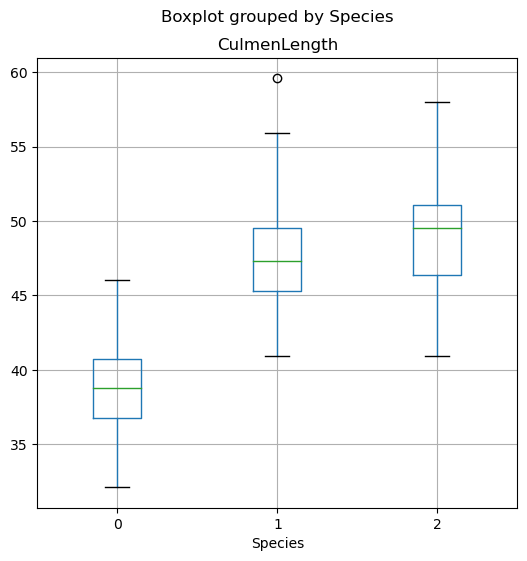

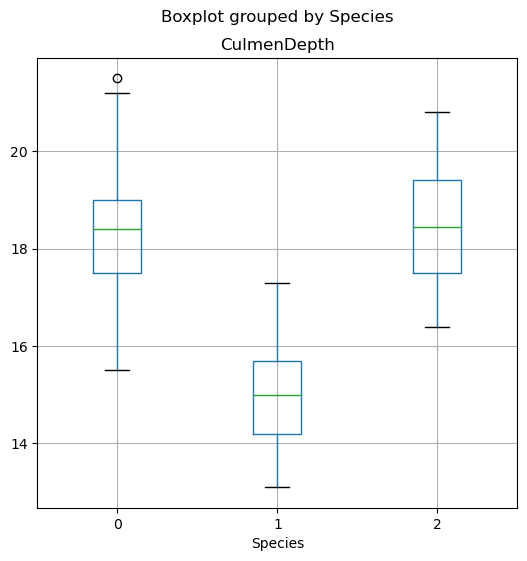

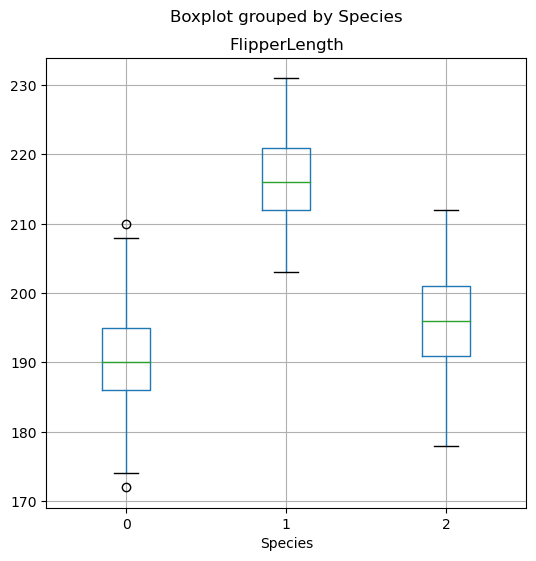

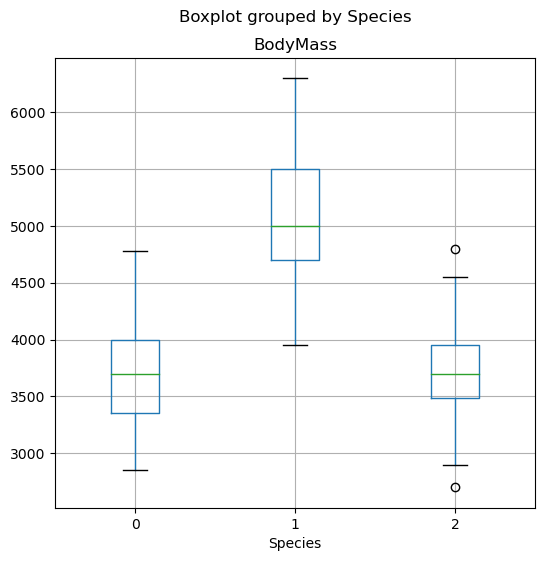

In [14]:
penguins_df_feature = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguins_df_label = 'Species'
for col in penguins_df_feature:
    penguins_df.boxplot(column = col, by = penguins_df_label, figsize=(6,6))
    plt.title(col)
    plt.show()

# Prepare the data

In [15]:
feature = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label ="Species"
X,y = penguins_df[penguins_df_feature].values, penguins_df[penguins_df_label].values


In [25]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0, stratify = y )
print("Training cases: %d\n Test Cases: %d " % (X_train.shape[0], X_test.shape[0]))

Training cases: 273
 Test Cases: 69 


In [22]:
#set regularization rate
reg = 0.1
# train a logistic regression model on the training set
multi_model = LogisticRegression(C = 1/reg, solver = "lbfgs", multi_class = "auto", max_iter = 10000).fit(X_train, y_train)
print(multi_model)

LogisticRegression(C=10.0, max_iter=10000)


In [26]:
predictions = multi_model.predict(X_test)
print("predicted labels: ", predictions[:10])
print("Actual labels: ", y_test[:10])

predicted labels:  [0 0 0 0 2 1 0 2 0 0]
Actual labels:  [0 0 0 0 2 1 0 2 0 0]


In [27]:
report = classification_report(y_test, predictions)
print("classification report: ", report)

classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        14

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [28]:
accuracy = accuracy_score(y_test, predictions)
print("accuracy score: ", accuracy)

accuracy score:  1.0


In [30]:
precision = precision_score(y_test, predictions, average = "macro")
print("precision score: ", precision)

precision score:  1.0


In [31]:
recall = recall_score(y_test, predictions, average = "macro")
print("recall score: ", recall)

recall score:  1.0


In [34]:
mcm = confusion_matrix(y_test, predictions)
print(mcm)

[[30  0  0]
 [ 0 25  0]
 [ 0  0 14]]


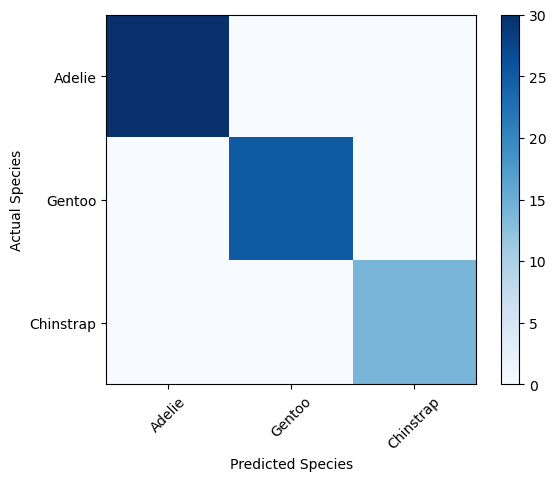

In [35]:
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

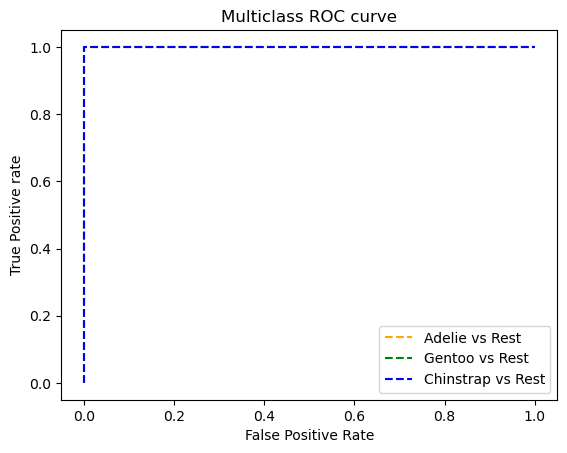

In [39]:
# Get class probability scores
penguin_prob = multi_model.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(penguin_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, penguin_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguin_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguin_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguin_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [40]:
auc = roc_auc_score(y_test,penguin_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 1.0


In [43]:
#define preprocessing for the numeric columns
feature_columns = [0,1,2,3]
feature_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
    ])
#create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("preprocess", feature_transformer, feature_columns)])
#creating training pipeline
pipeline = Pipeline(steps =[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])
# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(X_train, y_train)
print (multi_model)
                   

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Average AUC: 0.9978465978465979


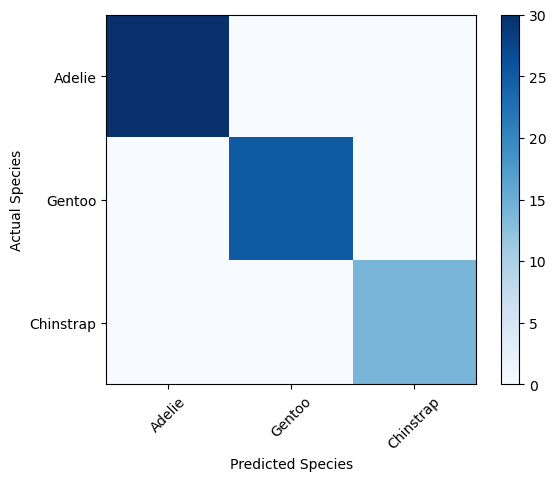

In [44]:
# Get predictions from test data
penguin_predictions = multi_model.predict(X_test)
penguin_prob = multi_model.predict_proba(X_test)

# Overall metrics
print("Overall Accuracy:", accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions, average='macro'))
print("Overall Recall:", recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,penguin_prob, multi_class='ovr'))

# Confusion matrix
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [46]:

# Save the model as a pickle file
filename = './penguin_model.pkl'
joblib.dump(multi_model, filename)

['./penguin_model.pkl']